In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('netflix.csv')

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,listed_in_split
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020.0,"[International TV Shows, TV Dramas, TV Sci-F..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016.0,"[Dramas, International Movies]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018.0,"[Horror Movies, International Movies]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017.0,"[Action & Adventure, Independent Movies, Sci..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020.0,[Dramas]


In [6]:
len(df)

7787


6. ¿Cómo se distribuye la cantidad de series y películas según
cada mes? Varía la categoría (listed in) según el mes del año? (RODRI)

In [8]:
# Convert the 'date_added' to datetime to extract the month
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the month name and year from the 'date_added' column
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [10]:
# Group by month and type to see the distribution of series and movies added each month
monthly_distribution = df.groupby(['month_added', 'type']).size().reset_index(name='count')

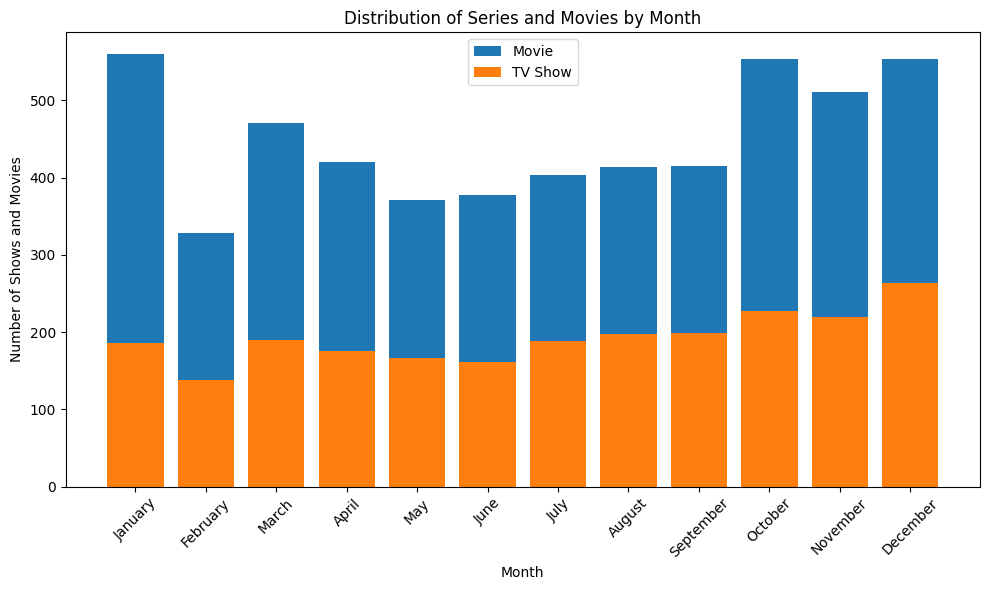

In [13]:
# Ensure 'month_added' is ordered correctly by months
monthly_distribution['month_added'] = pd.Categorical(
    monthly_distribution['month_added'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Sort the DataFrame by the ordered month names
monthly_distribution = monthly_distribution.sort_values('month_added')

# Plotting the histogram
plt.figure(figsize=(10, 6))

# Plot data for each type
for show_type in monthly_distribution['type'].unique():
    subset = monthly_distribution[monthly_distribution['type'] == show_type]
    plt.bar(subset['month_added'], subset['count'], label=show_type)

plt.xlabel('Month')
plt.ylabel('Number of Shows and Movies')
plt.title('Distribution of Series and Movies by Month')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Split the 'listed_in' column into individual categories
df['listed_in_split'] = df['listed_in'].str.split(',')

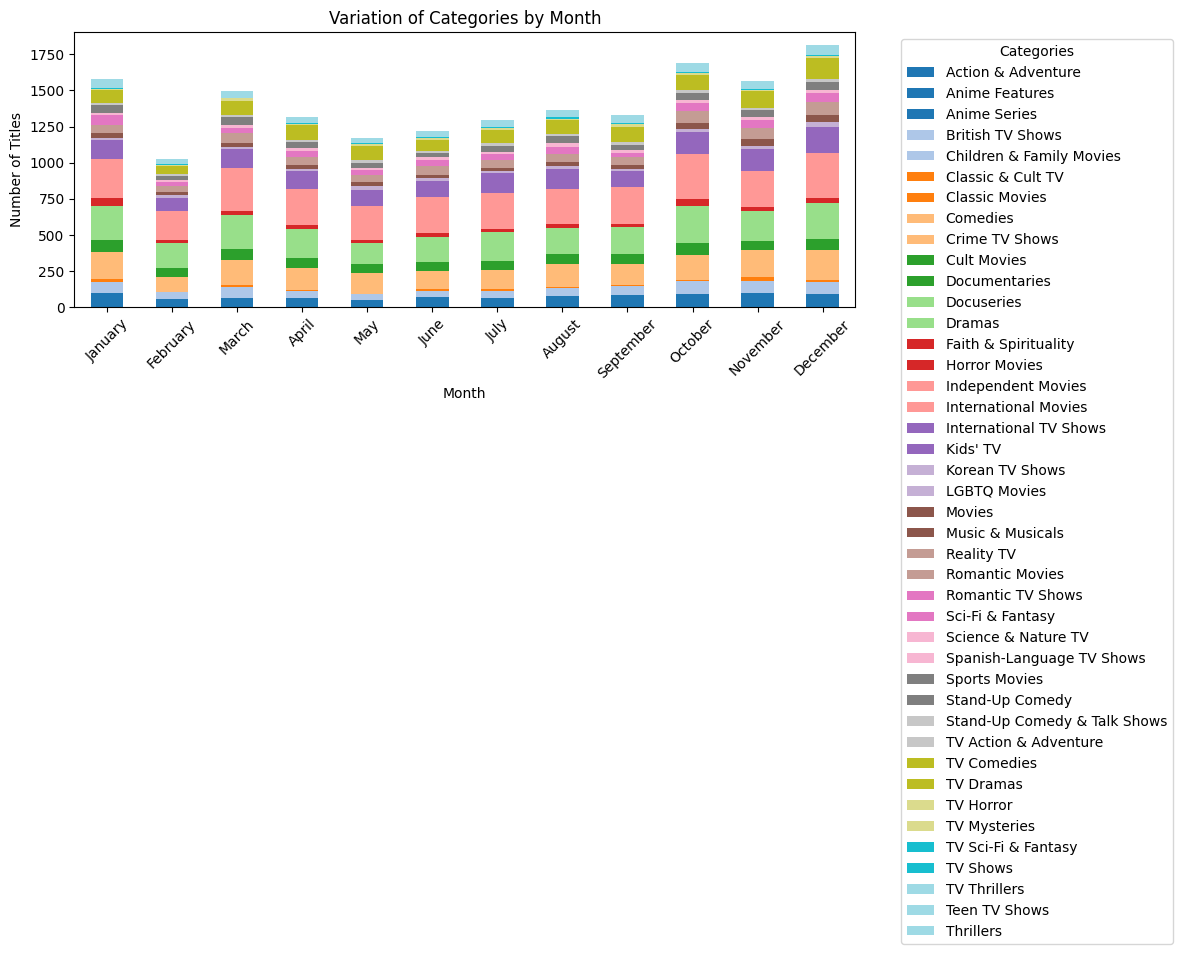

In [19]:
# Explode the dataframe so each category has its own row
category_exploded = df.explode('listed_in_split')

# Remove any leading/trailing whitespace from category names
category_exploded['listed_in_split'] = category_exploded['listed_in_split'].str.strip()

# Group by month and category to count occurrences
category_counts = category_exploded.groupby(['month_added', 'listed_in_split']).size().reset_index(name='count')

# Ensure 'month_added' is ordered correctly by months
category_counts['month_added'] = pd.Categorical(
    category_counts['month_added'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Sort the DataFrame by the ordered month names
category_counts = category_counts.sort_values('month_added')

# Pivot the data to have categories as columns
category_pivot = category_counts.pivot(index='month_added', columns='listed_in_split', values='count').fillna(0)

# Plotting the stacked bar chart
category_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.title('Variation of Categories by Month')
plt.xticks(rotation=45)
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

10. ¿Hay palabras que se utilicen más que otras en titulos y
descripciones? (RODRI)

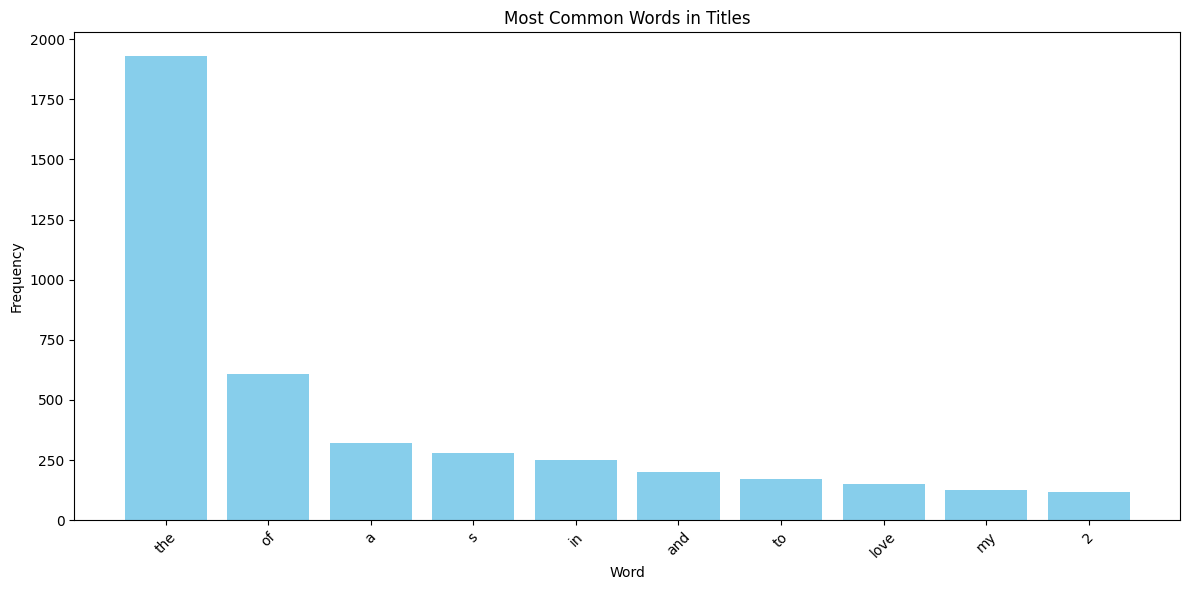

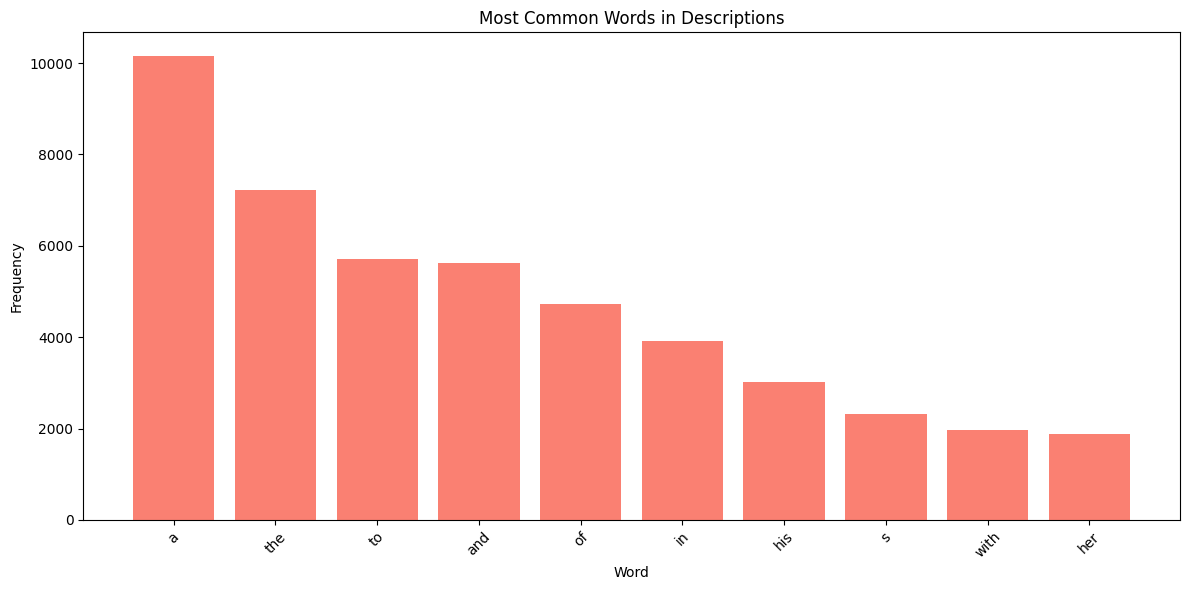

In [20]:
from collections import Counter
import matplotlib.pyplot as plt
import re

# Combine all titles and descriptions into single strings for word frequency analysis
all_titles = ' '.join(df['title'].dropna()).lower()
all_descriptions = ' '.join(df['description'].dropna()).lower()

# Use regular expressions to find all words, ignoring punctuation
title_words = re.findall(r'\b\w+\b', all_titles)
description_words = re.findall(r'\b\w+\b', all_descriptions)

# Count the frequency of each word in titles and descriptions
title_word_counts = Counter(title_words)
description_word_counts = Counter(description_words)

# Convert the counts to DataFrames for easier visualization
title_word_freq = pd.DataFrame(title_word_counts.most_common(10), columns=['Word', 'Frequency'])
description_word_freq = pd.DataFrame(description_word_counts.most_common(10), columns=['Word', 'Frequency'])

# Plotting the most common words in titles
plt.figure(figsize=(12, 6))
plt.bar(title_word_freq['Word'], title_word_freq['Frequency'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the most common words in descriptions
plt.figure(figsize=(12, 6))
plt.bar(description_word_freq['Word'], description_word_freq['Frequency'], color='salmon')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in Descriptions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rodrigo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


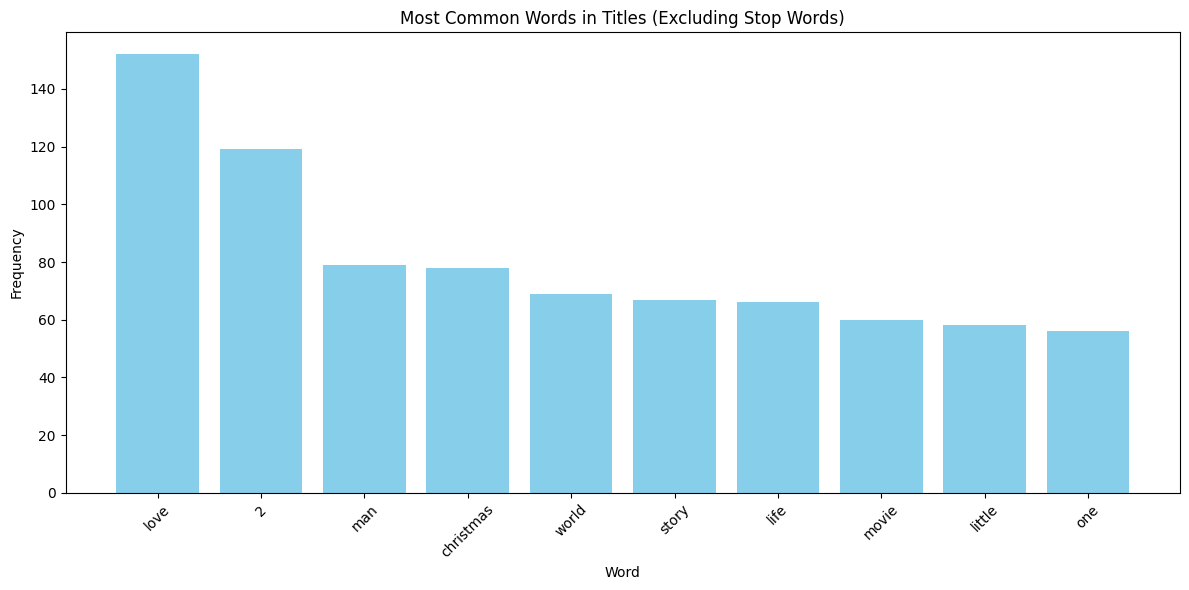

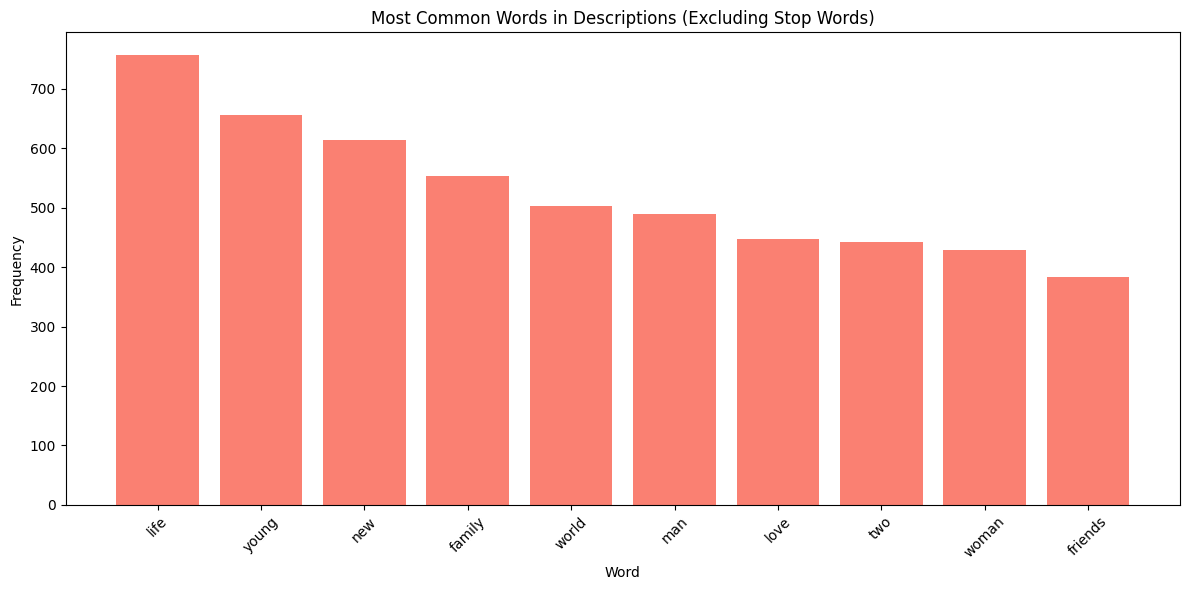

In [22]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import re

# Download the stopwords from NLTK
nltk.download('stopwords')

# Define the list of stopwords in English
stop_words = set(stopwords.words('english'))

# Combine all titles and descriptions into single strings for word frequency analysis
all_titles = ' '.join(df['title'].dropna()).lower()
all_descriptions = ' '.join(df['description'].dropna()).lower()

# Use regular expressions to find all words, ignoring punctuation
title_words = re.findall(r'\b\w+\b', all_titles)
description_words = re.findall(r'\b\w+\b', all_descriptions)

# Filter out stop words from the title and description words
filtered_title_words = [word for word in title_words if word not in stop_words]
filtered_description_words = [word for word in description_words if word not in stop_words]

# Count the frequency of each word in titles and descriptions after removing stop words
title_word_counts = Counter(filtered_title_words)
description_word_counts = Counter(filtered_description_words)

# Convert the counts to DataFrames for easier visualization
title_word_freq = pd.DataFrame(title_word_counts.most_common(10), columns=['Word', 'Frequency'])
description_word_freq = pd.DataFrame(description_word_counts.most_common(10), columns=['Word', 'Frequency'])

# Plotting the most common words in titles
plt.figure(figsize=(12, 6))
plt.bar(title_word_freq['Word'], title_word_freq['Frequency'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in Titles (Excluding Stop Words)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the most common words in descriptions
plt.figure(figsize=(12, 6))
plt.bar(description_word_freq['Word'], description_word_freq['Frequency'], color='salmon')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in Descriptions (Excluding Stop Words)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
